In [2]:
import casadi
from casadi import *
opti = casadi.Opti()

x = opti.variable()
y = opti.variable()

opti.minimize(  (y-x**2)**2   )
opti.subject_to( x**2+y**2==1 )
opti.subject_to(       x+y>=1 )

opti.solver('ipopt')


sol = opti.solve()

print(sol.value(x))
print(sol.value(y))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality co

In [3]:
from casadi import *


# Symbols/expressions
x = MX.sym('x')
y = MX.sym('y')
z = MX.sym('z')
f = x**2+100*z**2
g = z+(1-x)**2-y

nlp = {}                 # NLP declaration
nlp['x']= vertcat(x,y,z) # decision vars
nlp['f'] = f             # objective
nlp['g'] = g             # constraints

# Create solver instance
F = nlpsol('F','ipopt',nlp);

# Solve the problem using a guess
F(x0=[2.5,3.0,0.75],ubg=0,lbg=0)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  6.2500000e+01 0.00e+00 9.00e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

{'f': DM(0),
 'g': DM(0),
 'lam_g': DM(0),
 'lam_p': DM([]),
 'lam_x': DM([0, 0, 0]),
 'x': DM([0, 1, 0])}

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        8
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.6000000e-01 1.15e+00 5.51e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

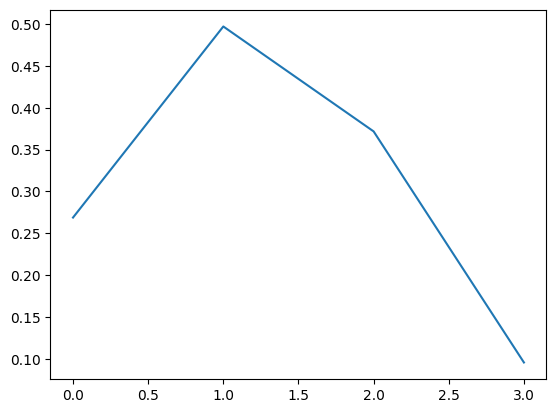

In [6]:
from casadi import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



x = MX.sym('x',2); # Two states
p = MX.sym('p');   # Free parameter

# Expression for ODE right-hand side
z = 1-x[1]**2;
rhs = vertcat(z*x[0]-x[1]+2*tanh(p),x[0])

# ODE declaration with free parameter
ode = {'x':x,'p':p,'ode':rhs}

# Construct a Function that integrates over 1s
F = integrator('F','cvodes',ode,{'tf':1})

# Control vector
u = MX.sym('u',4,1)

x = [0,1]  # Initial state
for k in range(4):
    # Integrate 1s forward in time:
    # call integrator symbolically
    res = F(x0=x,p=u[k])
    x = res["xf"]


# NLP declaration
nlp = {'x':u,'f':dot(u,u),'g':x};

# Solve using IPOPT
solver = nlpsol('solver','ipopt',nlp)
res = solver(x0=0.2,lbg=0,ubg=0)

plt.plot(res["x"])

In [7]:
opti = casadi.Opti()

x = opti.variable()
y = opti.variable()

opti.minimize(  (y-x**2)**2   )
opti.subject_to( x**2+y**2==1 )
opti.subject_to(       x+y>=1 )

opti.solver('ipopt')


sol = opti.solve()

print(sol.value(x))
print(sol.value(y))

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+00 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [11]:
# Import libraries
import casadi as cd
import numpy as np
import matplotlib.pyplot as plt

# Decision variables
x = cd.SX.sym("x",3)

# Parameters
p = [5.00,1.00]

# Objective function
f = x[0]*x[0] + x[1]*x[1] + x[2]*x[2]

# Concatenate nonlinear constraints
g = cd.vertcat(( 6*x[0] + 3*x[1] + 2*x[2] - p[0],   p[1]*x[0] +   x[1] -   x[2] -   1))

# Nonlinear bounds
lbg = [0.00, 0.00]
ubg = [0.00, 0.00]

# Input bounds for the optimization variables
lbx = [0.00, 0.00, 0.00]
ubx = [ cd.inf,  cd.inf,  cd.inf]

# Initial guess for the decision variables
x0  = [0.15, 0.15, 0.00]

# Create NLP solver
nlp = cd.SXFunction(cd.nlpIn(x=x),cd.nlpOut(f=f, g=g))
solver = cd.NlpSolver("ipopt", nlp)
# Initialize solver
solver.init()

# Pass the bounds and the initial values
solver.setInput( x0, "x0")
solver.setInput(lbx, "lbx")
solver.setInput(ubx, "ubx")
solver.setInput(lbg, "lbg")
solver.setInput(ubg, "ubg")

# Solve NLP
solver.evaluate()

NotImplementedError: Wrong number or type of arguments for overloaded function '_vertcat'.
  Possible prototypes are:
    _vertcat([Sparsity])
    _vertcat([DM])
    _vertcat([SX])
    _vertcat([MX])
  You have: '(((SX,SX)))'


Exception of type: DYNAMIC_LIBRARY_FAILURE in file "/work/build/external_projects/src/ipopt-external/src/Common/IpLibraryLoader.cpp" at line 59:
 Exception message: Error 126 while loading DLL libhsl.so: The specified module could not be found.


EXIT: Library loading failure.
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       total  |   1.00ms (  1.00ms)   1.51ms (  1.51ms)         1


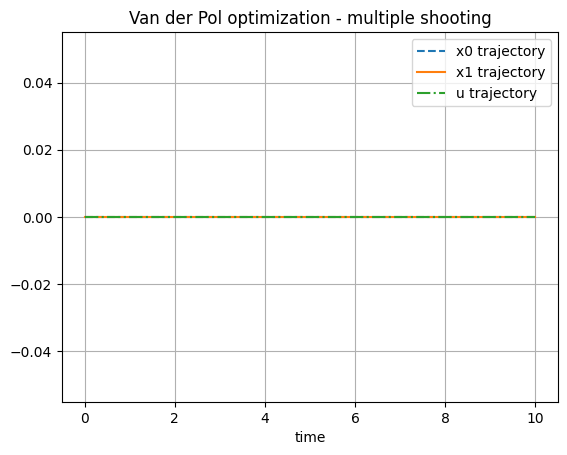

In [13]:
from casadi import *
# Declare variables
x0 = SX.sym('x0')
x1 = SX.sym('x1')
x = vertcat(x0, x1) # Differential states
z = SX.sym('z')       # Algebraic variable
u = SX.sym('u')       # Control

# Differential equation
f_x = vertcat(z*x0-x1+u, x0)

# Algebraic equation
f_z = x1**2 + z - 1

# Lagrange cost term (quadrature)
f_q = x0**2 + x1**2 + u**2

# Create an integrator
dae = {'x':x, 'z':z, 'p':u, 'ode':f_x, 'alg':f_z, 'quad':f_q}
opts = {'tf':0.5} # interval length
I = integrator('I', 'idas', dae, opts)

# Number of intervals
nk = 20

# Start with an empty NLP
w = []   # List of variables
lbw = [] # Lower bounds on w
ubw = [] # Upper bounds on w
G = []   # Constraints
J = 0    # Cost function

# Initial conditions
Xk = MX.sym('X0', 2)
w.append(Xk)
lbw += [ 0, 1 ]
ubw += [ 0, 1 ]

# Loop over all intervals
for k in range(nk):
  # Local control
  Uk = MX.sym('U'+str(k))
  w.append(Uk)
  lbw += [-0.75]
  ubw += [ 1.00]

  # Call integrator function
  Ik = I(x0=Xk, p=Uk)
  Xk = Ik['xf']
  J = J + Ik['qf'] # Sum quadratures

  # "Lift" the variable
  X_prev = Xk
  Xk = MX.sym('X'+str(k+1), 2)
  w.append(Xk)
  lbw += [-inf, -inf]
  ubw += [ inf,  inf]
  G.append(X_prev - Xk)

# Allocate an NLP solver
nlp = {'x':vertcat(*w), 'f':J, 'g':vertcat(*G)}
opts = {'ipopt.linear_solver':'ma27'}
solver = nlpsol('solver', 'ipopt', nlp, opts)

# Pass bounds, initial guess and solve NLP
sol = solver(lbx = lbw, # Lower variable bound
             ubx = ubw,  # Upper variable bound
             lbg = 0.0,  # Lower constraint bound
             ubg = 0.0,  # Upper constraint bound
             x0  = 0.0) # Initial guess

# Plot the results
import matplotlib.pyplot as plt
plt.figure(1)
plt.clf()
plt.plot(linspace(0., 10., nk+1), sol['x'][0::3],'--')
plt.plot(linspace(0., 10., nk+1), sol['x'][1::3],'-')
plt.plot(linspace(0., 10., nk), sol['x'][2::3],'-.')
plt.title('Van der Pol optimization - multiple shooting')
plt.xlabel('time')
plt.legend(['x0 trajectory','x1 trajectory','u trajectory'])
plt.grid()
plt.show()